<a href="https://colab.research.google.com/github/haticekrts/handwritten_recognition/blob/main/bitirmeproje.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml # mnist datasetini yüklemek için gerekli...
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

mnist=fetch_openml('mnist_784')

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
mnist.data.shape

(70000, 784)

In [ ]:
# Parametre olarak dtaaframe ve ilgili veri fotoğrafının index numarasını alsın..
def showimage (dframe, index):
    some_digit = dframe.to_numpy() [index]
    some_digit_image = some_digit.reshape(28,28)
    plt.imshow(some_digit_image,cmap="binary")
    plt.axis("off")
    plt.show()

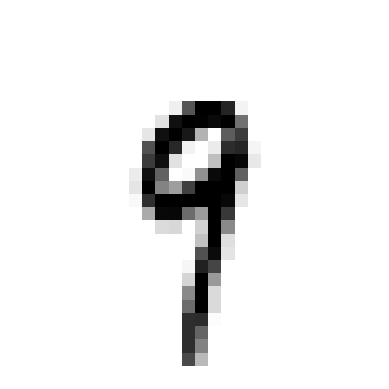

In [ ]:
showimage(mnist.data, 600)

In [ ]:
train_img, test_img, train_lbl, test_lbl = train_test_split( mnist.data, mnist.target, test_size=2/10.0, random_state=0)



In [ ]:
type(train_img)

pandas.core.frame.DataFrame

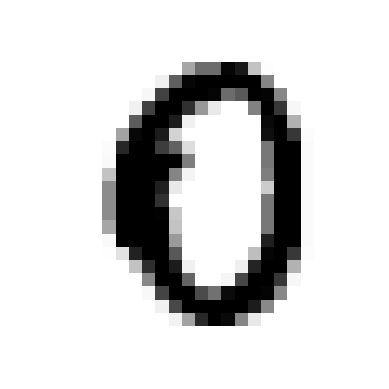

In [ ]:
test_img_copy = test_img.copy()
showimage (test_img_copy, 0)

In [ ]:
scaler = StandardScaler()
# Scaler' sadece training set üzerinde fit yapmamız yeterli..
scaler.fit(train_img)
#Ama transform işlemini hem training sete hem de test sete yapmamız gerekiyor..
train_img= scaler.transform(train_img)
test_img = scaler.transform(test_img)

In [ ]:
pca=PCA(.90)

In [ ]:
pca.fit(train_img)

PCA(n_components=0.9)

In [ ]:
print(pca.n_components_)

233


In [ ]:
train_img = pca.transform(train_img)
test_img = pca.transform(test_img)

In [ ]:
logisticRegr = LogisticRegression (solver = 'lbfgs', max_iter=10000)

In [ ]:
logisticRegr.fit(train_img, train_lbl)

LogisticRegression(max_iter=10000)

In [ ]:
logisticRegr.predict(test_img[100].reshape(1,-1))

NameError: name 'logisticRegr' is not defined

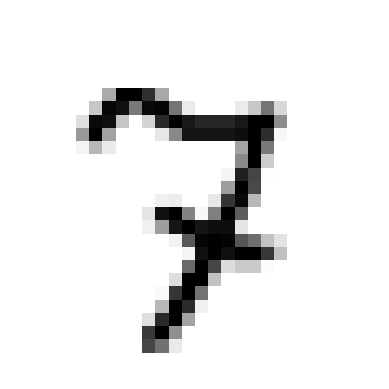

In [ ]:
showimage(test_img_copy,100)

In [ ]:
logisticRegr.predict(test_img[123].reshape(1,-1))

array(['1'], dtype=object)

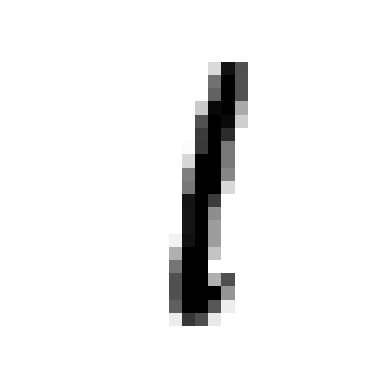

In [ ]:
showimage(test_img_copy,123)

In [ ]:
logisticRegr.score (test_img, test_lbl)

0.299